In [1]:
# ─── CHALLENGE 1 ────────────────────────────────────────────────────────────────

import numpy as np
import matplotlib.pyplot as plt

with open('input') as file:
    lines = file.read().splitlines()

# ─── Parse Input ──────────────────────────────────────────────────────────────
coords_x, coords_y, fold_along, fold_values = [], [], [], []
line: str
for line in lines:
    if len(line) == 0:
        continue
    if line[0].isdigit():
        x, y = line.split(',')
        coords_x.append(int(x))
        coords_y.append(int(y))
    if line[0] == 'f':
        string, value = line.split('=')
        fold_along.append(string[-1])
        fold_values.append(int(value))

dots_matrix = np.zeros(shape=(max(coords_y)+1, max(coords_x)+1), dtype=int)
for x, y in zip(coords_x, coords_y):
    dots_matrix[y,x] = 1

def apply_fold(matrix_in, axis, val):
    if axis == 'y':
        height = matrix_in.shape[1]
        perfect_fold_loc = (height - 1) / 2
        base = matrix_in[:val, :]
        height_flip = matrix_in.shape[0] - 1 - val
        flip = matrix_in[-height_flip:, :]
        flip = np.flip(flip, axis=0)
        if val < perfect_fold_loc:
            big, small = flip, base
        else:
            big, small = base, flip
        big[-small.shape[0]:, :] += small
    
    elif axis == 'x':
        width = matrix_in.shape[1]
        perfect_fold_loc = (width - 1) / 2
        base = matrix_in[:, :val]
        width_flip = matrix_in.shape[1] - 1 - val
        flip = matrix_in[:, -width_flip:]
        flip = np.flip(flip, axis=1)
        if val < perfect_fold_loc:
            big, small = flip, base
        else:
            big, small = base, flip
        big[:, -small.shape[1]:] += small
        
    return big

for i, (axis, val) in enumerate(zip(fold_along, fold_values)):
    dots_matrix = apply_fold(dots_matrix, axis, val)
    if i == 0:
        print('result 1: ', np.count_nonzero(dots_matrix))

result 1:  706


(-0.5, 39.5, 5.5, -0.5)

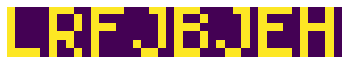

In [2]:
# ─── CHALLENGE 2 ────────────────────────────────────────────────────────────────

plt.imshow((dots_matrix > 0).astype(int))
plt.axis('off')